<a href="https://colab.research.google.com/github/Stuti0711/Deep-Learning/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:

%pip install pmdarima

In [22]:
from warnings import filterwarnings
filterwarnings('ignore')

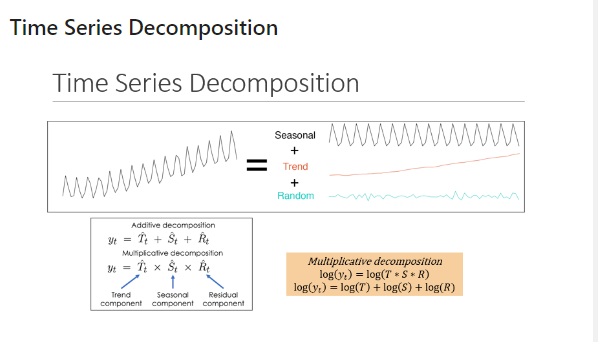

In [23]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Stuti0711/Time-Series-Analysis/main/AirPassengers.csv'
df = pd.read_csv(url , index_col ='Month', parse_dates = True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB



## Visualize the time series data

<function matplotlib.pyplot.show(close=None, block=None)>

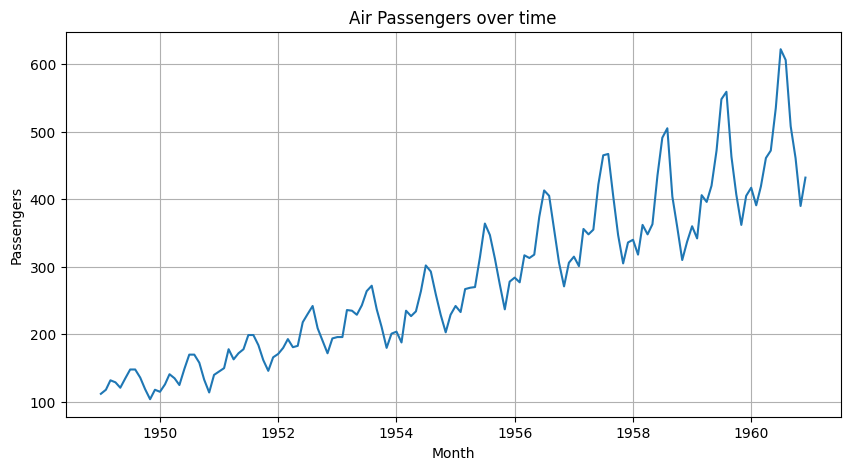

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df['Passengers'])
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Air Passengers over time')
plt.grid()
plt.show

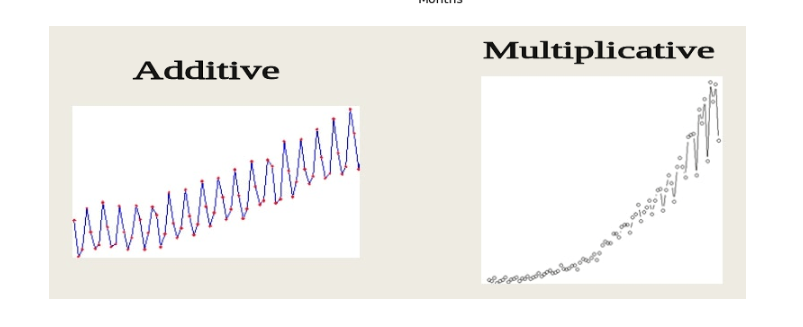

## Use multiplicative model for above time series

## Decomposition

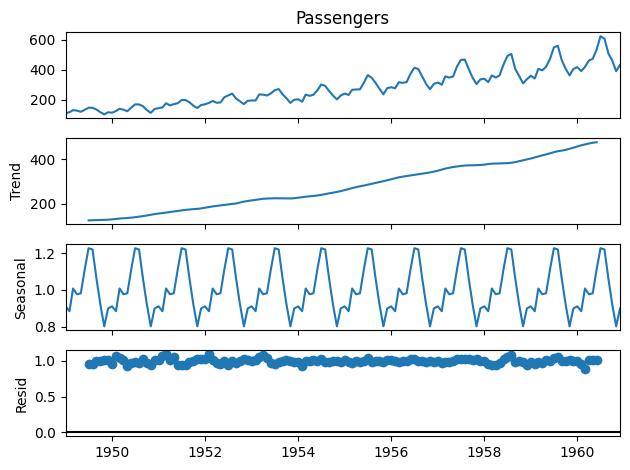

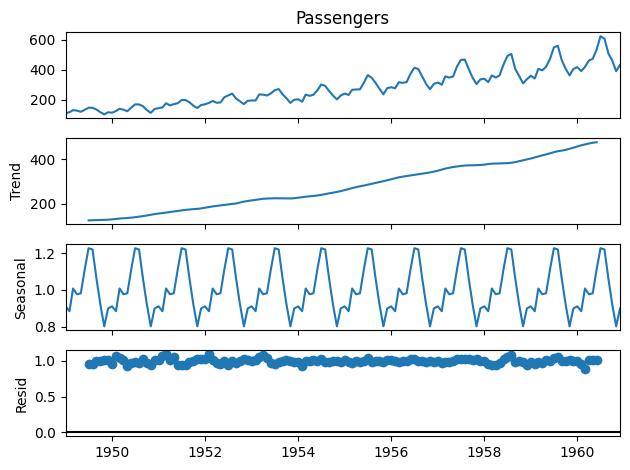

In [26]:

from statsmodels.tsa.seasonal import seasonal_decompose
Q = seasonal_decompose(df['Passengers'], model="multiplicative")
Q.plot()

In [27]:
Q.observed

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


In [29]:
Q.trend[10:]

,trend
Month,
1949-11-01,129.000000
1949-12-01,129.750000
1950-01-01,131.250000
1950-02-01,133.083333
1950-03-01,134.916667
1950-04-01,136.416667
1950-05-01,137.416667
1950-06-01,138.750000
1950-07-01,140.916667


In [30]:
Q.seasonal

,seasonal
Month,
1949-01-01,0.910230
1949-02-01,0.883625
1949-03-01,1.007366
1949-04-01,0.975906
1949-05-01,0.981378
1949-06-01,1.112776
1949-07-01,1.226556
1949-08-01,1.219911
1949-09-01,1.060492


In [31]:

Q.resid[10:]

,resid
Month,
1949-11-01,1.006270
1949-12-01,1.011812
1950-01-01,0.962603
1950-02-01,1.071467
1950-03-01,1.037447
1950-04-01,1.014048
1950-05-01,0.926903
1950-06-01,0.965041
1950-07-01,0.983557


## Trend plot

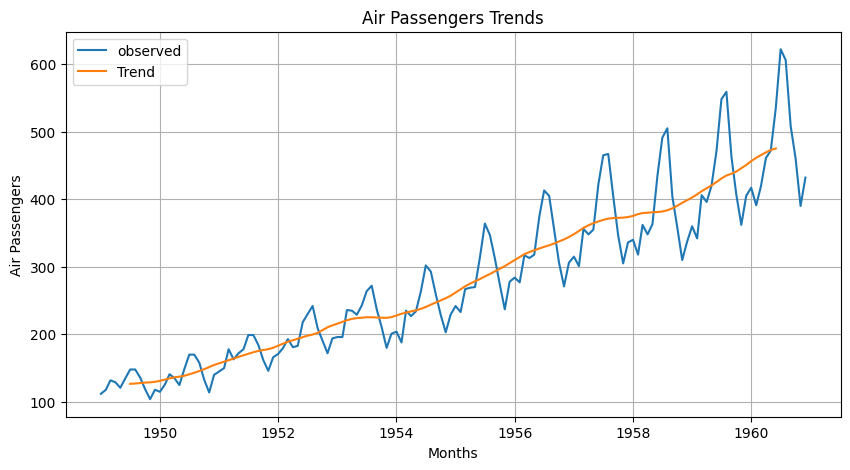

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(Q.observed, label='observed')
plt.plot(Q.trend, label='Trend')
plt.xlabel('Months')
plt.ylabel('Air Passengers')
plt.title('Air Passengers Trends')
plt.legend()
plt.grid()
plt.show()

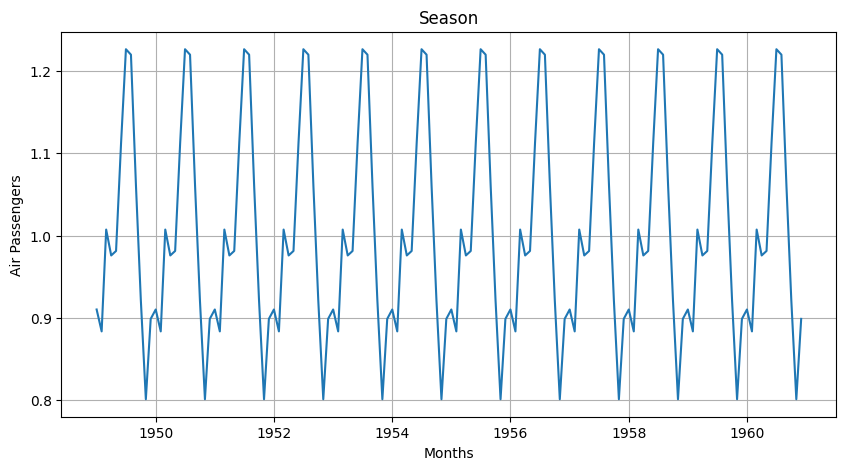

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(Q.seasonal)
plt.xlabel('Months')
plt.ylabel('Air Passengers')
plt.title('Season')
plt.grid()
plt.show()

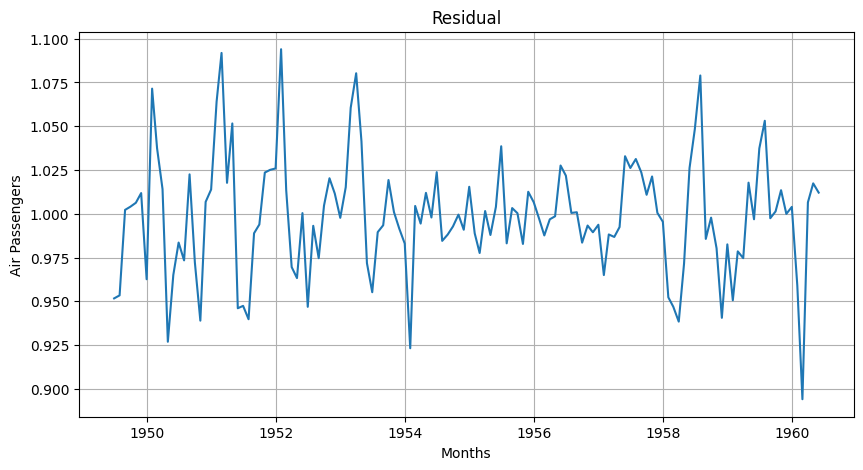

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(Q.resid)
plt.xlabel('Months')
plt.ylabel('Air Passengers')
plt.title('Residual')
plt.grid()
plt.show()

In [36]:
from pmdarima.arima import auto_arima
model = auto_arima(df['Passengers'], seasonal=True, m=12)

In [37]:
model.order

(2, 1, 1)

In [38]:
forecast, conf = model.predict(n_periods=12, return_conf_int=True)

In [39]:
forecast

,0
1961-01-01,445.634934
1961-02-01,420.395024
1961-03-01,449.198348
1961-04-01,491.839976
1961-05-01,503.394502
1961-06-01,566.862471
1961-07-01,654.260189
1961-08-01,638.597493
1961-09-01,540.883739
1961-10-01,494.126610


In [40]:
forecast = forecast.to_frame()
forecast.columns = ['Forecast']
forecast[['Lower', 'Upper']] = conf
forecast.head()

,Forecast,Lower,Upper
1961-01-01,445.634934,423.344848,467.925020
1961-02-01,420.395024,394.235397,446.554652
1961-03-01,449.198348,419.831711,478.564985
1961-04-01,491.839976,460.376259,523.303693
1961-05-01,503.394502,470.380453,536.408552


In [41]:
forecast = forecast.apply(round)

In [42]:
forecast

,Forecast,Lower,Upper
1961-01-01,446.0,423.0,468.0
1961-02-01,420.0,394.0,447.0
1961-03-01,449.0,420.0,479.0
1961-04-01,492.0,460.0,523.0
1961-05-01,503.0,470.0,536.0
1961-06-01,567.0,533.0,601.0
1961-07-01,654.0,619.0,689.0
1961-08-01,639.0,603.0,674.0
1961-09-01,541.0,505.0,577.0
1961-10-01,494.0,457.0,531.0


In [43]:
forecast.to_csv('forecast.csv')

## Plotting above result

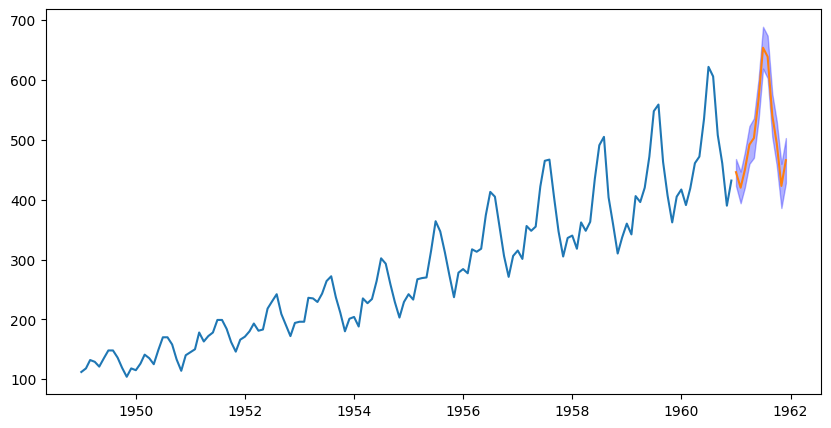

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(df['Passengers'], label='Observed')
plt.plot(forecast['Forecast'], label='Forecast')
plt.fill_between(forecast.index, forecast['Lower'], forecast['Upper'], color='b', alpha=0.3)